In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from statistics import mean
import textwrap
import csv

In [2]:
question = pd.read_csv('questions_flattened.csv')

In [3]:
question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8035 non-null   int64 
 1   topic              8035 non-null   object
 2   from               8035 non-null   object
 3   to                 8035 non-null   object
 4   contents           8035 non-null   object
 5   date               8035 non-null   object
 6   type               8035 non-null   object
 7   party              8035 non-null   object
 8   state              8035 non-null   object
 9   constituency       8035 non-null   object
 10  constituency_type  1677 non-null   object
dtypes: int64(1), object(10)
memory usage: 690.6+ KB


In [4]:
question.head()

,id,topic,from,to,contents,date,type,party,state,constituency,constituency_type
0,1,Centrally Sponsored Educational Institutes in ...,"Tadas, Shri Ramdas Chandrabhanji",EDUCATION,Will the Minister of EDUCATION be pleased to s...,2021-11-29,STARRED,Bharatiya Janata Party,Maharashtra,Wardha,NaN
1,1,Centrally Sponsored Educational Institutes in ...,"Sule, Smt. Supriya Sadanand",EDUCATION,Will the Minister of EDUCATION be pleased to s...,2021-11-29,STARRED,Nationalist Congress Party,Maharashtra,Baramati,NaN
2,2,Policy on Air Pollution,"Patil, Shri Bheemrao Baswanthrao","ENVIRONMENT, FOREST AND CLIMATE CHANGE","Will the Minister of ENVIRONMENT, FOREST AND C...",2021-11-29,STARRED,Telangana Rashtra Samithi,Telangana,Zahirabad,NaN
3,3,Ecological Sensitive Areas,"Kuriakose, Adv. Dean","ENVIRONMENT, FOREST AND CLIMATE CHANGE","Will the Minister of ENVIRONMENT, FOREST AND C...",2021-11-29,STARRED,Indian National Congress,Kerala,Idukki,NaN
4,4,Appointment of Directors in PSBs,"Syed Imtiaz Jaleel, Shri",FINANCE,Will the Minister of FINANCE be pleased to sta...,2021-11-29,STARRED,All India Majlis-E-Ittehadul Muslimeen,Maharashtra,Aurangabad,NaN


In [5]:
#check number of rows and columns

print(f"There are {question.shape[0]} rows and {question.shape[1]} columns in dataset")

There are 8035 rows and 11 columns in dataset


In [6]:
#These are not all unique questions. Check how many unique questions were presented

print(f"A total of {question.contents.unique().shape[0]} unique questions were asked in the Lok Sabha from {question.date.min()} to {question.date.max()}")

A total of 4750 unique questions were asked in the Lok Sabha from 2021-11-29 to 2021-12-23


Proper Fromatting of a question

In [7]:
def pprint_question(question, width=80):
    if question.type == "STARRED" :
        print(f"*Q.{question['id']}", end="")
    else:
        print(f"Q.{question['id']}", end="")
    print(question['date'].rjust(width, ' '))
    print(f"By: {question ['from']}")
    print("")
    print(question['topic'].center(width, ' '))
    print("")
    contents = question['contents']
    contents = contents.replace('(a)','\n(a)').replace('(b)','\n(b)').replace('(c)','\n(c)').replace('(d)','\n(d)').\
                        replace('(e)','\n(e)').replace('(f)','\n(f)').replace('(g)','\n(g)').replace('(h)','\n(h)')
    contents_lines = contents.splitlines()
    for line in contents_lines:
        print(textwrap.fill(line, width=width))
        
pprint_question(question.iloc[0])

*Q.1                                                                      2021-11-29
By: Tadas, Shri Ramdas Chandrabhanji

           Centrally Sponsored Educational Institutes in Maharashtra            

Will the Minister of EDUCATION be pleased to state:
(a) a comprehensive list of Centrally sponsored educational institutes
established in Maharashtra since the year 2014 containing the details such as
the courses offered, number of students studied every year, the number of
teaching faculty and non-teaching staff, etc. in each institute;
(b) the number of graduate students passed out from each institute along with
the total budget sanctioned and released for the overall development of these
institutes so far;
(c) whether the Union Government has not released the total sanctioned funds for
the purpose;
(d) if so, the details thereof along with the reasons therefor; and
(e) the appropriate steps taken or proposed to be taken by the Government to
release the rest of the funds for the ove

In [8]:
#Which MP is asking most questions

question_member_wise = question.groupby('from')['from'].agg(['count']).sort_values('count', ascending=False).reset_index()
question_member_wise.columns = ['MP', 'Number of Questions']
question_member_wise

,MP,Number of Questions
0,"Bapat, Shri Girish Bhalchandra",53
1,"Majumdar, Dr. Sukanta",50
2,"Shewale, Shri Rahul Ramesh",50
3,"Sahu, Shri Chandra Sekhar",49
4,"Munde, Dr. Pritam Gopinath Rao",49
...,...,...
399,"Sarkar, Shri Jagannath",1
400,"Roy, Dr. Rajdeep",1
401,"Maurya, Dr. Sanghamitra",1
402,"Vasava, Shri Prabhubhai Nagarbhai",1


In [9]:
question['Question Length'] = question.contents.apply(len)
question_length_wise = question.sort_values('Question Length')
[['from', 'id', 'date', 'type', 'topic', 'contents', 'Question Length']]
question_length_wise

,id,topic,from,to,contents,date,type,party,state,constituency,constituency_type,Question Length
5532,2848,Kotipali-Narasapuram Railway Line,"Margani, Shri Bharat Ram",RAILWAYS,Will the Minister of RAILWAYS be pleased to st...,2021-12-15,UNSTARRED,Yuvajana Sramika Rythu Congress Party,Andhra Pradesh,Rajahmundry,NaN,161
7603,4088,Theft in Trains,"Jayakumar, Dr. K.",RAILWAYS,Will the Minister of RAILWAYS be pleased to st...,2021-12-22,UNSTARRED,Indian National Congress,Tamil Nadu,Tiruvallur,SC,167
7269,3862,Panchayat System,"Firojiya, Shri Anil",PANCHAYATI RAJ,Will the Minister of PANCHAYATI RAJ be pleased...,2021-12-21,UNSTARRED,Bharatiya Janata Party,Madhya Pradesh,Ujjain,SC,170
4425,2268,Setting up of Yoga Kendras,"Sharma, Shri Jugal Kishore",AYUSH,Will the Minister of AYUSH be pleased to state...,2021-12-10,UNSTARRED,Bharatiya Janata Party,Jammu and Kashmir,Jammu,NaN,181
4424,2268,Setting up of Yoga Kendras,"Pathak, Smt. Riti",AYUSH,Will the Minister of AYUSH be pleased to state...,2021-12-10,UNSTARRED,Bharatiya Janata Party,Madhya Pradesh,Sidhi,NaN,181
...,...,...,...,...,...,...,...,...,...,...,...,...
839,410,Losses due to Rains and Floods,"Vijayakumar (Alias) Vijay Vasanth , Shri",HOME AFFAIRS,Will the Minister of HOME AFFAIRS be pleased t...,2021-11-30,UNSTARRED,Indian National Congress,Tamil Nadu,Kanniyakumari,NaN,1343
836,410,Losses due to Rains and Floods,"Thirunavukkarasar, Shri Su.",HOME AFFAIRS,Will the Minister of HOME AFFAIRS be pleased t...,2021-11-30,UNSTARRED,Indian National Congress,Tamil Nadu,Tiruchirappalli,NaN,1343
841,410,Losses due to Rains and Floods,"Kirtikar, Shri Gajanan Chandrakant",HOME AFFAIRS,Will the Minister of HOME AFFAIRS be pleased t...,2021-11-30,UNSTARRED,Shiv Sena,Maharashtra,Mumbai-North-West,NaN,1343
849,410,Losses due to Rains and Floods,"Chellakumar, Dr. A.",HOME AFFAIRS,Will the Minister of HOME AFFAIRS be pleased t...,2021-11-30,UNSTARRED,Indian National Congress,Tamil Nadu,Krishnagiri,NaN,1343


In [10]:
pprint_question(question_length_wise.iloc[0])

Q.2848                                                                      2021-12-15
By: Margani, Shri Bharat Ram

                       Kotipali-Narasapuram Railway Line                        

Will the Minister of RAILWAYS be pleased to state: the status of Kotipali-
Narasapuram railway line and the details of the cost and time overruns of this
project?


In [11]:
pprint_question(question_length_wise.iloc[-1])

Q.4121                                                                      2021-12-22
By: Singh, Shri Sushil Kumar

                     Cases of Cheating in Kendriya Bhandar                      

Will the PRIME MINISTER be pleased to state:
(a) whether some vendors of Kendriya Bhandar have cheated and caused pecuniary
loss to Kendriya Bhandar as stated by the OSD(vigilance) in the Office Order
No.KB/5/2020-Vig (Mis-3) dated 6.3.2020;
(b) if so, the details thereof and modus-operandi adopted by the said vendors of
Kendriya Bhandar;
(c) whether the said vendors who have cheated Kendriya Bhandar have been
identified and if so, the details thereof and the action taken against them;
(d) whether the vendor involved in cheating Kendriya Bhandar are still doing
business with Kendriya Bhandar and they visit Kendriya Bhandars head office
daily and are in constant touch with the management of Kendriya Bhandar;
(e) whether the Secretary(Personnel) CWO and CVO Kendriya Bhandar have received
comp

In [12]:
def count_average_agg(q):
    names = {
        'Number of Questions':q.id.count(),
        'Average Questions Length': q['Question Length'].mean()
    }
    return pd.Series(names, index=['Number of Questions', 'Average Question Length'])

question.groupby('from').apply(count_average_agg).reset_index().sort_values('Average Question Length', ascending=False)

,from,Number of Questions,Average Question Length
0,"A. Raja, Shri",20.0,NaN
1,"Adhikari, Shri Deepak (Dev)",10.0,NaN
2,"Adhikari, Shri Dibyendu",16.0,NaN
3,"Adhikari, Shri Sisir Kumar",13.0,NaN
4,Adv. A. M. Ariff,24.0,NaN
...,...,...,...
399,"Yadav, Shri Ashok Kumar",3.0,NaN
400,"Yadav, Shri Dinesh Chandra",13.0,NaN
401,"Yadav, Shri Ram Kripal",8.0,NaN
402,"Yadav, Shri Shyam Singh",16.0,NaN


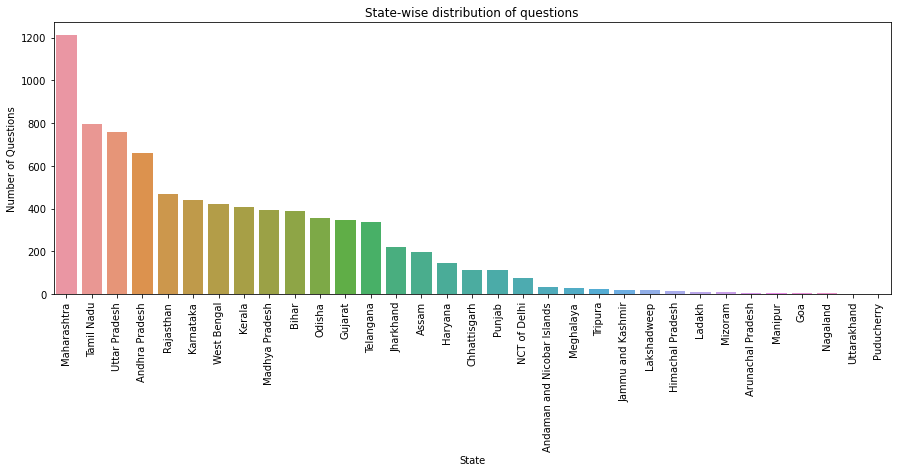

In [13]:
# Let's find out which state's MPs have been the most active
questions_state_wise = question.groupby('state')['state'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_state_wise.columns = ['State', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('State-wise distribution of questions')
sns.barplot(x='State', y='Number of Questions', data=questions_state_wise)
plt.xticks(rotation=90)
plt.show()

We see Bigger states are more active in asking more questions

In [14]:
members = pd.read_csv('members.csv')

In [15]:
state_counts = members.groupby('State')['State'].count().to_dict()

# Map state_counts to questions_state_wise
questions_state_wise['Number of MPs'] = questions_state_wise['State'].map(state_counts)

# Check out state wise questions now
questions_state_wise.head()

,State,Number of Questions,Number of MPs
0,Maharashtra,1211,48
1,Tamil Nadu,798,39
2,Uttar Pradesh,761,80
3,Andhra Pradesh,659,25
4,Rajasthan,468,25


In [16]:
questions_state_wise['State MP Activity Score'] = questions_state_wise['Number of Questions'] / questions_state_wise['Number of MPs']
questions_state_wise.head()

,State,Number of Questions,Number of MPs,State MP Activity Score
0,Maharashtra,1211,48,25.229167
1,Tamil Nadu,798,39,20.461538
2,Uttar Pradesh,761,80,9.512500
3,Andhra Pradesh,659,25,26.360000
4,Rajasthan,468,25,18.720000


In [17]:
question[question['state']=='Andaman and Nicobar Islands'][['id', 'from', 'to', 'topic']]

,id,from,to,topic
41,5,"Sharma, Shri Kuldeep Rai","ENVIRONMENT, FOREST AND CLIMATE CHANGE",Ban on single use plastics
387,205,"Sharma, Shri Kuldeep Rai",EDUCATION,Shiksha Parv
417,210,"Sharma, Shri Kuldeep Rai",LABOUR AND EMPLOYMENT,India’s National Employment Policy
552,240,"Sharma, Shri Kuldeep Rai",AGRICULTURE AND FARMERS WELFARE,Crop Loss due to Heavy Rains and Floods
895,419,"Sharma, Shri Kuldeep Rai",SOCIAL JUSTICE AND EMPOWERMENT,Implementation of PM-DAKSH
902,421,"Sharma, Shri Kuldeep Rai",YOUTH AFFAIRS AND SPORTS,National Sports Awards
1094,491,"Sharma, Shri Kuldeep Rai","CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION",Data on Edible Oil
1133,517,"Sharma, Shri Kuldeep Rai",RAILWAYS,Enhance Freight Earnings
1229,592,"Sharma, Shri Kuldeep Rai",ELECTRONICS AND INFORMATION TECHNOLOGY,Digital Villages
1384,671,"Sharma, Shri Kuldeep Rai",TEXTILES,Comprehensive Handloom Cluster Development Scheme


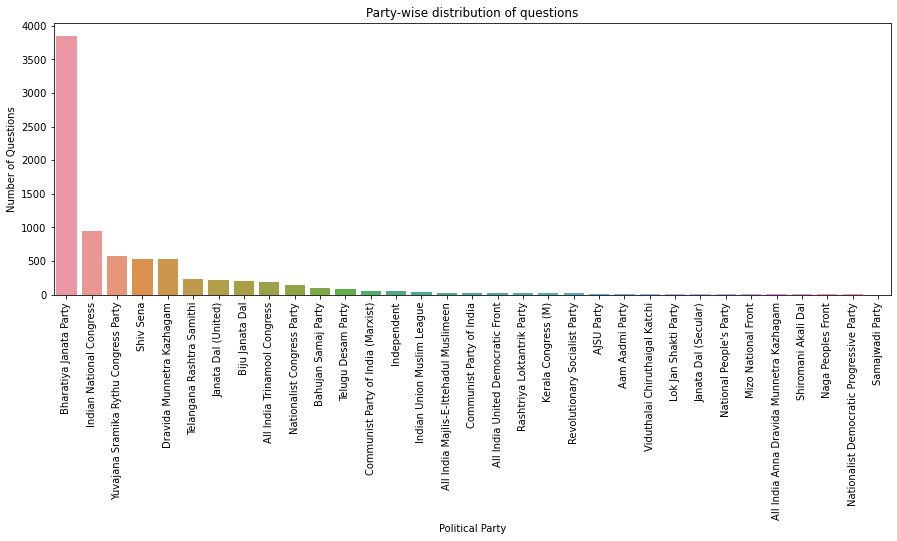

In [18]:
question_party_wise = question.groupby('party')['party'].agg(['count']).sort_values('count', ascending=False).reset_index()
question_party_wise.columns = ['Political Party', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('Party-wise distribution of questions')
sns.barplot(x='Political Party', y='Number of Questions', data=question_party_wise)
plt.xticks(rotation=90)
plt.show()

In [19]:
# This graph isn't surprising. Need to formulate a Party MP Activity Score for better insights
# Find number of members from each Party
party_counts = members.groupby('Party')['Party'].count().to_dict()

# Map party_counts to questions_party_wise
question_party_wise['Number of MPs'] = question_party_wise['Political Party'].map(party_counts)

# Check out party wise questions now
question_party_wise.head()

,Political Party,Number of Questions,Number of MPs
0,Bharatiya Janata Party,3849,301
1,Indian National Congress,951,53
2,Yuvajana Sramika Rythu Congress Party,582,22
3,Shiv Sena,537,19
4,Dravida Munnetra Kazhagam,529,24


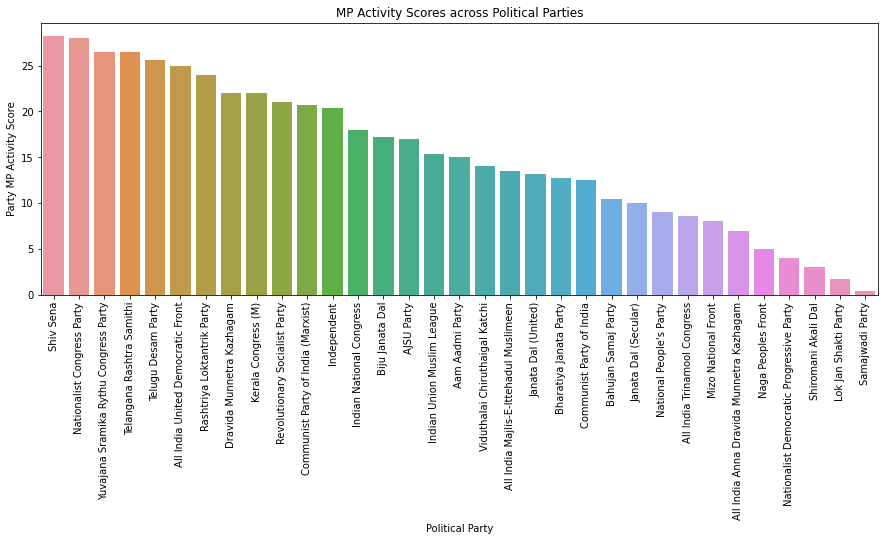

In [20]:
# Calculate Party MP Activity Score
question_party_wise['Party MP Activity Score'] = question_party_wise['Number of Questions'] / question_party_wise['Number of MPs']

# Let's finally find out which party's MPs have been the most active
question_party_wise = question_party_wise.sort_values('Party MP Activity Score', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('MP Activity Scores across Political Parties')
sns.barplot(x='Political Party', y='Party MP Activity Score', data=question_party_wise)
plt.xticks(rotation=90)
plt.show()

In [32]:
import csv

def FetchDetails(place):
    Details = []
    try:
        with open('questions_flattened.csv', 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            header = next(csvreader) 
            for row in csvreader:
                if len(row) > 9 and place.lower() in row[9].lower():
                    Details.append(row)
    except FileNotFoundError:
        print("Error: CSV file not found!")
    except Exception as e:
        print(f"An error occurred: {e}")
    return Details

def main():
    place = input("Please enter your constituency: ")
    output = FetchDetails(place)
    
    if output:
        print(f"Questions asked from MP elected in 2019 for constituency '{place}':")
        for dest in output:
            print("Topic : ", dest[1] if len(dest) > 1 else "N/A")
            print("From : ", dest[2] if len(dest) > 2 else "N/A")
            print("To : ", dest[3] if len(dest) > 3 else "N/A")
            print("Contents : ", dest[4] if len(dest) > 4 else "N/A")
            print("Date : ", dest[5] if len(dest) > 5 else "N/A")
            print("Type : ", dest[6] if len(dest) > 6 else "N/A")
            print("Party : ", dest[7] if len(dest) > 7 else "N/A")
            print("State : ", dest[8] if len(dest) > 8 else "N/A")
            print("------------")
    else:
        print(f"No data found for constituency: {place}")

if __name__ == "__main__":
    main()


Please enter your constituency: Nashik
An error occurred: 'charmap' codec can't decode byte 0x9d in position 7405: character maps to <undefined>
Questions asked from MP elected in 2019 for constituency 'Nashik':
Topic :  PMKK in Maharashtra
From :  Godse, Shri Hemant Tukaram
To :  SKILL DEVELOPMENT AND ENTREPRENEURSHIP
Contents :  Will the Minister of SKILL DEVELOPMENT AND ENTREPRENEURSHIP be pleased to state: (a) the number of Pradhan Mantri Kaushal Kendras (PMKKs) in Maharashtra at present and the district- wise details thereof; (b) whether the Government is considering to set up hostels for youths coming to rural areas for training; (c) if so, the details thereof; and (d) whether there is any plan to give priority to the skilled youths in employment in public and private sector and if so, the details thereof?
Date :  2021-11-29
Type :  UNSTARRED
Party :  Shiv Sena
State :  Maharashtra
------------
Topic :  River Lake and Pond Fishing
From :  Godse, Shri Hemant Tukaram
To :  FISHERIE

In [53]:
import csv 
def FetchInfo(name):
    Details = []
    try:
        with open('17_LS_MP_Track.csv', 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            header = next(csvreader)  # Skip the header row
            
            # Iterate over each row to find matching MP name
            for row in csvreader:
                if len(row) > 1 and name.lower() in row[1].lower():
                    Details.append(row)
    except FileNotFoundError:
        print("Error: CSV file not found!")
    except Exception as e:
        print(f"An error occurred: {e}")
    return Details

def main():
    name = input("Please enter your elected MP from 2019: ").strip()
    
    # Input validation to ensure a name is provided
    if not name:
        print("Invalid input. Please enter a valid MP name.")
        return
    
    output = FetchInfo(name)
    
    if output:
        print(f"Details of MP: '{name}':")
        for dest in output:
            print("Membership : ", dest[2] if len(dest) > 2 else "N/A")
            print("Term start date : ", dest[3] if len(dest) > 3 else "N/A")
            print("Term end : ", dest[4] if len(dest) > 4 else "N/A")
            print("Term : ", dest[5] if len(dest) > 5 else "N/A")
            print("Constituency : ", dest[6] if len(dest) > 6 else "N/A")
            print("State : ", dest[7] if len(dest) > 7 else "N/A")
            print("Party : ", dest[8] if len(dest) > 8 else "N/A")
            print("Gender : ", dest[9] if len(dest) > 9 else "N/A")
            print("Educational Qualifications : ", dest[10] if len(dest) > 10 else "N/A")
            print("Educational Qualifications Details : ", dest[11] if len(dest) > 11 else "N/A")
            print("Age : ", dest[12] if len(dest) > 12 else "N/A")
            print("Debates : ", dest[13] if len(dest) > 13 else "N/A")
            print("Private Member Bills : ", dest[14] if len(dest) > 14 else "N/A")
            #print("Number of Questions : ", dest[15] if len(dest) > 15 else "N/A")
            #print("Attendance : ", dest[16] if len(dest) > 16 else "N/A")
            print("------------")
    else:
        print(f"No data found for MP: {name}")

if __name__ == "__main__":
    main()


Please enter your elected MP from 2019: Rahul Gandhi
Details of MP: 'Rahul Gandhi':
Membership :  Elected
Term start date :  23-05-2019
Term end :  In Office
Term :  Fourth Term
Constituency :  Wayanad
State :  Kerala
Party :  Indian National Congress
Gender :  Male
Educational Qualifications :  Post Graduate
Educational Qualifications Details :  M.Phil. (Development Economics); Educated at Trinity College, Cambridge University (UK) .
Age :  53
Debates :  8
Private Member Bills :  0
------------
